<a href="https://www.kaggle.com/code/omarhammemi/notebook92c48c272e?scriptVersionId=106717318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np
from pymongo import MongoClient


# All Classes

In [2]:
dt=pd.read_csv('../input/dt-new/dt.csv')
df1 = pd.read_excel('../input/recommendation-sys/1ere.xlsx')
df2 = pd.read_excel('../input/recommendation-sys/2eme.xlsx')
df3 = pd.read_excel('../input/recommendation-sys/3eme.xlsx')
df4 = pd.read_excel('../input/recommendation-sys/4eme.xlsx')
df5 = pd.read_excel('../input/recommendation-sys/5eme.xlsx')
df6 = pd.read_excel('../input/recommendation-sys/6eme.xlsx')
# df1['level']=1;df2['level']=1;df3['level']=1;df4['level']=1;df5['level']=1;df6['level']=1

In [3]:
dt=dt.set_index('keys')
dt

,level_id,name,total_time,donuts,candy,level,progress,id Quizo,nbr Items,Mothebra,...,Math_pb,Normal,Science_pb,Global Inteligence,Linguistic Inteligence,Logical Inteligence,No Inteligence,Achiver,Explorer,Socializer
keys,,,,,,,,,,,,,,,,,,,,,
1700,3,koussay ben ali,0:50:19,46,350,1,0.000000,0,0,0,...,0.005309,99.932441,0.003184,1.082056,2.621389,1.610795,94.685760,24.698163,73.229714,2.072122
1714,6,┘ç╪º┘ä╪⌐,9:13:49,638,3500,7,0.000000,430,9,10,...,0.003152,99.902973,0.085920,3.210050,90.168474,0.457958,6.163518,52.145204,16.000015,31.854781
1745,7,┘ç╪º┘ä╪⌐5,0:46:16,31,350,1,0.000000,0,0,8,...,0.007287,99.978321,0.006245,1.936193,92.894463,0.454362,4.714982,0.136640,98.475123,1.388237
1751,8,┘ç╪º┘ä╪⌐6,0:26:38,25,350,1,0.428571,454,1,10,...,0.006646,99.982405,0.005225,92.998723,1.198567,1.068894,4.733816,0.065872,98.249613,1.684515
1766,5,hammoudi nourane,0:23:45,15,350,1,0.000000,0,0,0,...,0.007524,99.965607,0.015112,0.773914,7.839121,84.323564,7.063402,12.502070,84.690780,2.807150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64653,4,╪╣╪▓┘è╪▓ ╪¿┘å┘à╪¿╪º╪▒┘â,0:48:32,46,350,1,0.000000,0,0,3,...,0.003207,98.751140,0.002561,73.833400,0.742640,7.952078,17.471881,2.488010,94.780015,2.731974
64660,5,maysa gaidi,0:32:42,20,350,1,0.000000,0,0,3,...,0.002676,99.907440,0.001268,0.645849,0.167905,0.571154,98.615091,15.814078,82.030222,2.155700
64662,5,┘è┘ê╪│┘ü ╪¿┘ê╪▓╪╣╪¬╪▒,0:21:35,22,350,1,0.000000,0,0,2,...,0.005235,99.979826,0.004917,0.768075,0.084873,70.195516,28.951536,0.843993,87.356695,11.799312


In [4]:
def Prepare(df1):
      new_cols = []
      for i,j,k in zip(list(df1.iloc[3]), list(df1.iloc[2]),  list(df1.iloc[1])):
            new_cols.append(i + " :" + j + " (" + k + ")")

      p_cols = []
      #Keep only the percentage for each module
      for col in new_cols:
         if "**" in col or "%" in col :
            p_cols.append(col)

      # Create the new dataset
      new_df = df1
      new_df.columns = new_cols
      new_df = new_df.drop([0,1,2,3],axis=0)
      new_df = new_df[p_cols]
      data=new_df.copy()
      data.set_index('** :subject (name)', inplace=True)
      df = data.dropna(axis = 0, how = 'all')
      maths,physic,arab,French,challenge=[],[],[],[],[]
      for  col in df.columns :
            if "ألعاب تحدي" in col:
               challenge.append(col)
            if "رياضيات" in col:
               maths.append(col)
            if "إيقاظ"in col:
               physic.append(col) 
            if "عربية" in col:
               arab.append(col)  
            if "Français" in col:
               French.append(col)
      maths=df[maths]
      French=df[French]
      arab=df[arab]
      physic=df[physic]
      challenge=df[challenge]
      maths=maths.fillna(0)
      arab=arab.fillna(0)
      French=French.fillna(0)
      challenge=challenge.fillna(0)
      physic=physic.fillna(0)
      maths['perfermance']=maths.sum(axis=1)/len(maths.columns)*100
      arab['perfermance']=arab.sum(axis=1)/len(arab.columns)*100
      challenge['perfermance']=challenge.sum(axis=1)/len(challenge.columns)*100
      physic['perfermance']=physic.sum(axis=1)/len(physic.columns)*100
      French['perfermance']=French.sum(axis=1)/len(French.columns)*100
      df['math_perfermance']=maths['perfermance'] 
      df['arab_perfermance']=arab['perfermance']
      df['challenge_perfermance']=challenge['perfermance']
      df['physic_perfermance']=physic['perfermance']
      df['French_perfermance']=French['perfermance']
      all=df['math_perfermance']+df['arab_perfermance']+df['physic_perfermance']+df['French_perfermance']+df['challenge_perfermance']
      df['math_perfermance%']=(maths['perfermance']/all)*100
      df['challenge_perfermance%']=(challenge['perfermance']/all)*100
      df['arab_perfermance%']=(arab['perfermance']/all)*100
      df['physic_perfermance%']=(physic['perfermance']/all)*100
      df['French_perfermance%']=(French['perfermance']/all)*100
      df.fillna(0)
      return df,maths,arab,physic,French,challenge


In [5]:
df1,maths1,arab1,physic1,French1,challenge1=Prepare(df1)
df2,maths2,arab2,physic2,French2,challenge2=Prepare(df2)
df3,maths3,arab3,physic3,French3,challenge3=Prepare(df3)
df4,maths4,arab4,physic4,French4,challenge4=Prepare(df4)
df5,maths5,arab5,physic5,French5,challenge5=Prepare(df5)
df6,maths6,arab6,physic6,French6,challenge6=Prepare(df6)
df1['level']=1;df2['level']=2;df3['level']=3;df4['level']=4;df5['level']=5;df6['level']=1
data=[df1,df2,df3,df4,df5,df6]
# for d in data:
#     d.fillna(0)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [6]:
df4.fillna(0)

,% :إيقاظ علمي (الحواس),% :إيقاظ علمي (التنقل),% :رياضيات (أكون الأعداد ذات 5 أرقام و أفككها و أركبها),"% :رياضيات (الأعداد ذات خمسة أرقام , مقارنة و ترتيب)",% :رياضيات (أتصرف في القطع النقدية و الأوراق المالية),"% :رياضيات (أتصرف في وحدات قيس الأطوال , المتر و أجزاؤه)","% :رياضيات (المسالك على الشبكة , اختصار المسالك و تعيين على موقع الشبكة)",% :رياضيات (تعرف المستقيم و أجزاءه),% :رياضيات (ألعاب تحدي درجة 1),% :رياضيات (ألعاب تحدي درجة 2),...,arab_perfermance,challenge_perfermance,physic_perfermance,French_perfermance,math_perfermance%,challenge_perfermance%,arab_perfermance%,physic_perfermance%,French_perfermance%,level
** :subject (name),,,,,,,,,,,,,,,,,,,,,
1175,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,1.705882,0.0,0.0,0.0,0.0,100.0,0.0,4
1449,0.0,0.0,0.00,0.0,0.11,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,4
1482,0.0,0.0,0.08,0.0,0.11,0.0,0.0,0.2,0.0,0.0,...,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,4
1484,0.0,0.0,0.00,0.0,0.11,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,4
1527,0.0,0.0,0.00,0.0,0.06,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71351,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,4
71365,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.84,0.0,0.000000,0.0,0.0,0.0,100.0,0.0,0.0,4
71385,0.0,0.0,0.17,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,4


# **Users Perfermance in Maths**

<AxesSubplot:xlabel='** :subject (name)'>

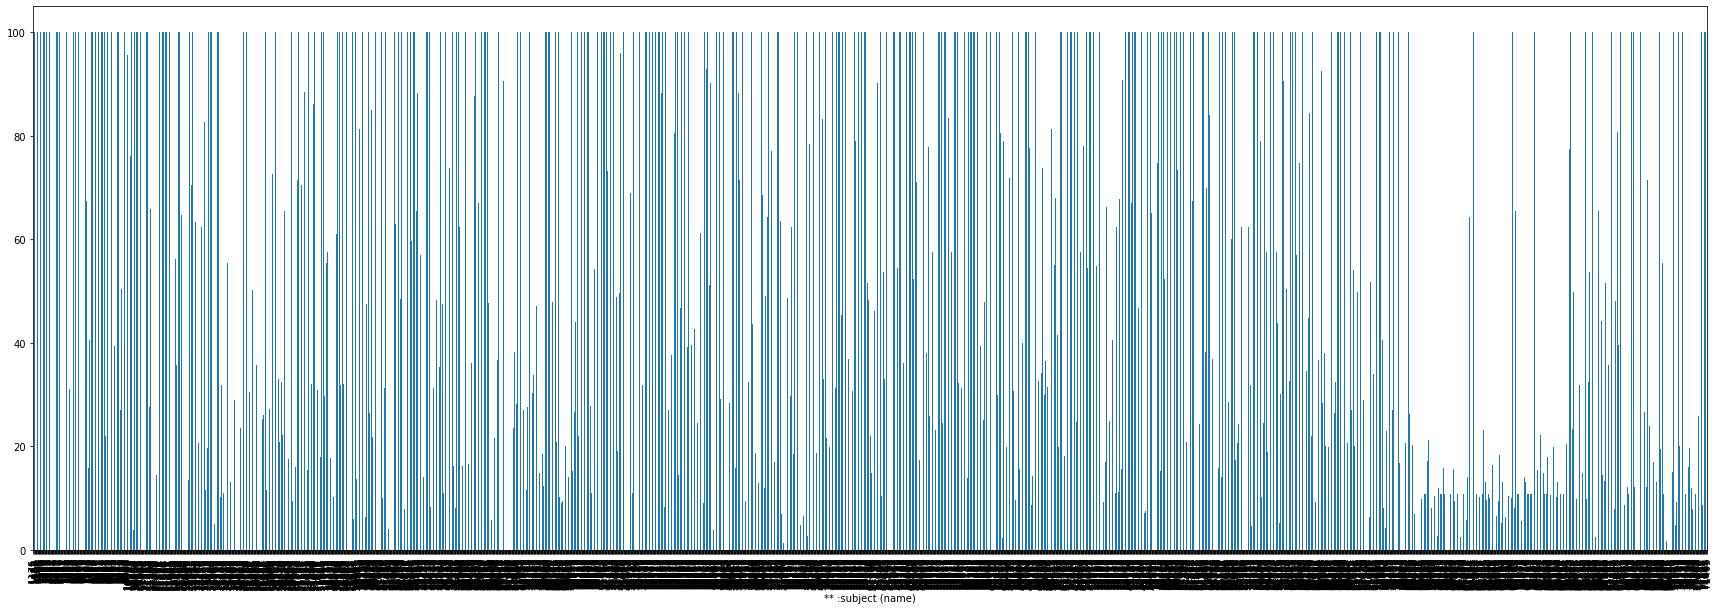

In [7]:
df4['math_perfermance%'].plot(kind='bar',figsize=(30,10))

# Hitmap of Users Pefermances in differents areas

In [8]:
import seaborn as sns
corr_matrix = df4.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,math_perfermance,arab_perfermance,challenge_perfermance,physic_perfermance,French_perfermance,math_perfermance%,challenge_perfermance%,arab_perfermance%,physic_perfermance%,French_perfermance%,level
math_perfermance,1.000000,0.448335,0.531295,0.721684,0.455168,-0.121889,0.197946,0.117068,-0.023189,0.111010,nan
arab_perfermance,0.448335,1.000000,0.382038,0.461254,0.782519,-0.133829,0.111040,0.391509,-0.009966,0.203374,nan
challenge_perfermance,0.531295,0.382038,1.000000,0.369214,0.338526,-0.251383,0.607385,0.103938,-0.122218,0.083003,nan
physic_perfermance,0.721684,0.461254,0.369214,1.000000,0.468125,-0.374029,0.071749,0.128959,0.312995,0.121691,nan
French_perfermance,0.455168,0.782519,0.338526,0.468125,1.000000,-0.147137,0.104040,0.229639,-0.009157,0.412605,nan
math_perfermance%,-0.121889,-0.133829,-0.251383,-0.374029,-0.147137,1.000000,-0.347749,-0.134701,-0.802227,-0.150060,nan
challenge_perfermance%,0.197946,0.111040,0.607385,0.071749,0.104040,-0.347749,1.000000,0.049972,-0.237164,0.033241,nan
arab_perfermance%,0.117068,0.391509,0.103938,0.128959,0.229639,-0.134701,0.049972,1.000000,-0.043691,0.175710,nan
physic_perfermance%,-0.023189,-0.009966,-0.122218,0.312995,-0.009157,-0.802227,-0.237164,-0.043691,1.000000,-0.062678,nan
French_perfermance%,0.111010,0.203374,0.083003,0.121691,0.412605,-0.150060,0.033241,0.175710,-0.062678,1.000000,nan


In [9]:
df4=df4.fillna(0)

In [10]:
import plotly.graph_objects as go
a=df4['arab_perfermance'].sum()
f=df4['French_perfermance'].sum()
p=df4['physic_perfermance'].sum()
m=df4['math_perfermance'].sum()
labels = ['arab', 'French', 'physic', 'math']
values = [a,f,p,m]
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show(figsize=())

In [11]:
perform=[]
for col in df4.columns:
    if 'perfermance' in col:
        perform.append(col)
df4=df4[perform]
m=[]
for col in dt.columns:
    if 'math' in col or 'Math' in col:
        m.append(col)
p=[]
for col in df4.columns:
    if 'perfermance%' in col:
        p.append(col)
pattern1=df4[p]
pattern2=dt[['level_id', 'total_time', 'donuts', 'candy', 'level','progress', 'total_Time_Education', 'nb_mistakes','correct Question', 'correct_Q_Math', 'correct_Q_Science','correct_Q_Ar', 'correct_Q_Fr', 'Q_Best_Time', 'best_time_math','best_time_science', 'best_time_ar', 'best_time_fr', 'Q_Worst_Time','worst_time_math', 'worst_time_science', 'worst_time_ar','worst_time_fr', 'Q_Avg_Time', 'Avg_Time_math', 'Avg_Time__science','Avg_Time_ar', 'Avg_Time_fr', 'French_pb', 'Concentration', 'Arabic_pb','Math_pb', 'Normal', 'Science_pb', 'Global Inteligence','Linguistic Inteligence', 'Logical Inteligence', 'No Inteligence','Achiver', 'Explorer', 'Socializer']]
pattern1

,math_perfermance%,challenge_perfermance%,arab_perfermance%,physic_perfermance%,French_perfermance%
** :subject (name),,,,,
1175,0.0,0.0,0.0,100.0,0.0
1449,100.0,0.0,0.0,0.0,0.0
1482,100.0,0.0,0.0,0.0,0.0
1484,100.0,0.0,0.0,0.0,0.0
1527,100.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
71351,100.0,0.0,0.0,0.0,0.0
71365,0.0,0.0,100.0,0.0,0.0
71385,100.0,0.0,0.0,0.0,0.0


In [12]:
pattern2.columns

Index(['level_id', 'total_time', 'donuts', 'candy', 'level', 'progress',
       'total_Time_Education', 'nb_mistakes', 'correct Question',
       'correct_Q_Math', 'correct_Q_Science', 'correct_Q_Ar', 'correct_Q_Fr',
       'Q_Best_Time', 'best_time_math', 'best_time_science', 'best_time_ar',
       'best_time_fr', 'Q_Worst_Time', 'worst_time_math', 'worst_time_science',
       'worst_time_ar', 'worst_time_fr', 'Q_Avg_Time', 'Avg_Time_math',
       'Avg_Time__science', 'Avg_Time_ar', 'Avg_Time_fr', 'French_pb',
       'Concentration', 'Arabic_pb', 'Math_pb', 'Normal', 'Science_pb',
       'Global Inteligence', 'Linguistic Inteligence', 'Logical Inteligence',
       'No Inteligence', 'Achiver', 'Explorer', 'Socializer'],
      dtype='object')

In [13]:
dt.columns

Index(['level_id', 'name', 'total_time', 'donuts', 'candy', 'level',
       'progress', 'id Quizo', 'nbr Items', 'Mothebra', 'Tarkiz', 'Najeh',
       'Tamayouz', 'irti9a2', 'total_Time_Education', 'nb_mistakes',
       'correct Question', 'correct_Q_Math', 'correct_Q_Science',
       'correct_Q_Ar', 'correct_Q_Fr', 'Q_Best_Time', 'best_time_math',
       'best_time_science', 'best_time_ar', 'best_time_fr', 'Q_Worst_Time',
       'worst_time_math', 'worst_time_science', 'worst_time_ar',
       'worst_time_fr', 'Q_Avg_Time', 'Avg_Time_math', 'Avg_Time__science',
       'Avg_Time_ar', 'Avg_Time_fr', 'French_pb', 'Concentration', 'Arabic_pb',
       'Math_pb', 'Normal', 'Science_pb', 'Global Inteligence',
       'Linguistic Inteligence', 'Logical Inteligence', 'No Inteligence',
       'Achiver', 'Explorer', 'Socializer'],
      dtype='object')

In [14]:
education=pattern2[['level_id','total_time',  'donuts', 'candy','nb_mistakes', 'correct Question','correct_Q_Math', 'correct_Q_Science', 'correct_Q_Ar', 'correct_Q_Fr','Q_Best_Time', 'best_time_math', 'best_time_science', 'best_time_ar','best_time_fr', 'Q_Worst_Time', 'worst_time_math', 'worst_time_science','worst_time_ar', 'worst_time_fr', 'Q_Avg_Time', 'Avg_Time_math','Avg_Time__science', 'Avg_Time_ar', 'Avg_Time_fr', 'French_pb','Concentration', 'Arabic_pb', 'Math_pb', 'Normal', 'Science_pb','Global Inteligence', 'Linguistic Inteligence', 'Logical Inteligence','No Inteligence', 'Achiver', 'Explorer', 'Socializer']]
education['level_id']=education['level_id']-2
m,ar,fr,sc,c=[],[],[],[],[]
for col in education.columns:
    if 'maths' in col or 'Math' in col or 'ma' in col or 'Ma' in col :
        m.append(col)
    elif 'ar' in col or 'Ar' in col :
        ar.append(col)
    elif 'french' in col or 'Fr' in col or 'fr' in col :
        fr.append(col)
    elif 'science' in col or 'Sci' in col or 'sc' in col :
        sc.append(col)
    elif  'don' in col or 'candy' in col or 'level' in col or  'total_time' in col:
        c.append(col)
m.append('correct Question' )
ar.append('correct Question' )
fr.append('correct Question' )
sc.append('correct Question' )
math=education[m]
arab=education[ar]
french=education[fr]
science=education[sc]
compete=education[c]
education['perfermance_math']=math['correct_Q_Math']/math['correct Question']
education['perfermance_arab']=arab['correct_Q_Ar']/arab['correct Question']
education['perfermance_french']=french['correct_Q_Fr']/french['correct Question']
education['perfermance_Science']=science['correct_Q_Science']/science['correct Question']
from time import time


compete=education[c]
def time_to_seconds(l):
            tm=[]
            for time in l['total_time']:
                time=str(time)
                h,m,s=time.split(':')
                h=int(h)
                m=int(m)
                s=int(s)
                t=h*3600+m*60+s
                tm.append(t)
            return  tm
compete['seconds']=time_to_seconds(compete)
compete=compete.drop('total_time',axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [15]:
compete['donuts'].max(),compete['candy'].max(),compete['seconds'].max()
m1=compete['candy'].max()
m2=compete['donuts'].max()
compete['condy_percent']=[(i/m1)*100 for i in compete['candy']]
compete['donut_percent']=[(i/m2)*100 for i in compete['donuts']]
compete['donut_percent'].max(),compete['condy_percent'].max()
compete1=compete[['condy_percent', 'donut_percent']]


In [16]:
education['perfermance_Challenge%']=((compete['condy_percent']+compete['donut_percent'])/2).tolist()
education['perfermance_Science']=(education['perfermance_Science']/education['perfermance_Science'].max())*100
education['perfermance_math']=(education['perfermance_math']/education['perfermance_math'].max())*100
education['perfermance_arab']=(education['perfermance_arab']/education['perfermance_arab'].max())*100
education['perfermance_french']=(education['perfermance_french']/education['perfermance_french'].max())*100
pattern2=education.iloc[:,25:]
pattern2=pattern2[['perfermance_math', 'perfermance_arab','perfermance_french', 'perfermance_Science', 'perfermance_Challenge%','French_pb', 'Concentration', 'Arabic_pb', 'Math_pb', 'Normal','Science_pb', 'Global Inteligence', 'Linguistic Inteligence','Logical Inteligence', 'No Inteligence', 'Achiver', 'Explorer','Socializer' ]]

In [17]:
for i,data in enumerate(pattern2.Normal):
    if data>50:
        pattern2['French_pb'][i]=50
        pattern2['Concentration'][i]=50
        pattern2['Arabic_pb'][i]=50
        pattern2['Math_pb'][i]=50
        pattern2['Science_pb'][i]=50
pattern2=pattern2.drop('Normal',axis=1)
patt2=pattern2[['perfermance_math','perfermance_Challenge%','perfermance_arab','perfermance_Science','perfermance_french']]

In [18]:
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(list_1, list_2):
  cos_sim = dot(list_1, list_2) / (norm(list_1) * norm(list_2))
  return cos_sim

In [19]:
id1=patt2.index;id2=pattern1.index
id1=id1[:1000];id2=id2[:1000]
id=np.zeros(len(id1)*len(id2))
similarity=pd.DataFrame({'id1':id,'id2':id,'similarity':id})
for i in range(len(id1)):
    for j in range(len(id2)):
    #    print(i,j)
       similarity['similarity'][i]=cosine_similarity(patt2.iloc[i],pattern1.iloc[j])
       similarity['id1'][i]=id1[i]
       similarity['id2'][j]=id2[j]
similarity = similarity.drop_duplicates(subset = 'id2')
similarity = similarity.drop_duplicates(subset = 'id1')
similarity=similarity[similarity['similarity']>0.5]
similarity.reset_index(drop=True, inplace=True)

# Similarity Between The Web Data and The specific Exercices Data used by users

In [20]:
similarity

,id1,id2,similarity
0,1700.0,1175.0,0.876881
1,1745.0,1482.0,0.755319
2,1751.0,1484.0,0.517917
3,1880.0,1808.0,0.650912
4,1923.0,1885.0,0.812778
...,...,...,...
731,14849.0,31725.0,0.964950
732,14851.0,31788.0,0.574527
733,14860.0,31826.0,0.886292
734,14868.0,31879.0,0.893640


In [21]:
dt

,level_id,name,total_time,donuts,candy,level,progress,id Quizo,nbr Items,Mothebra,...,Math_pb,Normal,Science_pb,Global Inteligence,Linguistic Inteligence,Logical Inteligence,No Inteligence,Achiver,Explorer,Socializer
keys,,,,,,,,,,,,,,,,,,,,,
1700,3,koussay ben ali,0:50:19,46,350,1,0.000000,0,0,0,...,0.005309,99.932441,0.003184,1.082056,2.621389,1.610795,94.685760,24.698163,73.229714,2.072122
1714,6,┘ç╪º┘ä╪⌐,9:13:49,638,3500,7,0.000000,430,9,10,...,0.003152,99.902973,0.085920,3.210050,90.168474,0.457958,6.163518,52.145204,16.000015,31.854781
1745,7,┘ç╪º┘ä╪⌐5,0:46:16,31,350,1,0.000000,0,0,8,...,0.007287,99.978321,0.006245,1.936193,92.894463,0.454362,4.714982,0.136640,98.475123,1.388237
1751,8,┘ç╪º┘ä╪⌐6,0:26:38,25,350,1,0.428571,454,1,10,...,0.006646,99.982405,0.005225,92.998723,1.198567,1.068894,4.733816,0.065872,98.249613,1.684515
1766,5,hammoudi nourane,0:23:45,15,350,1,0.000000,0,0,0,...,0.007524,99.965607,0.015112,0.773914,7.839121,84.323564,7.063402,12.502070,84.690780,2.807150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64653,4,╪╣╪▓┘è╪▓ ╪¿┘å┘à╪¿╪º╪▒┘â,0:48:32,46,350,1,0.000000,0,0,3,...,0.003207,98.751140,0.002561,73.833400,0.742640,7.952078,17.471881,2.488010,94.780015,2.731974
64660,5,maysa gaidi,0:32:42,20,350,1,0.000000,0,0,3,...,0.002676,99.907440,0.001268,0.645849,0.167905,0.571154,98.615091,15.814078,82.030222,2.155700
64662,5,┘è┘ê╪│┘ü ╪¿┘ê╪▓╪╣╪¬╪▒,0:21:35,22,350,1,0.000000,0,0,2,...,0.005235,99.979826,0.004917,0.768075,0.084873,70.195516,28.951536,0.843993,87.356695,11.799312


In [22]:
#dt.loc[int(similarity['id1'][2])]['exercices_id']=2
#dt.loc[int(similarity['id1'][2])]['exercices_id'],similarity['id2'][2]
#df4.loc[int(similarity['id2'][i])]['personal_id']


In [23]:
df4['personal_id']=np.zeros(df4.shape[0])
dt['exercices_id']=np.zeros(dt.shape[0])
#for i in range(similarity.shape[0]):
#    try :
#        df4.iloc[int(similarity.iloc[i]['id1'])]['persenol_id']=similarity['id2'][i]
#        dt.iloc[int(similarity.iloc[i]['id2'])]['exercices_id']=similarity['id1'][i]
#        print('done')
#    except:
#        print('Not Include')
for i in range(similarity.shape[0]):
        #dt.loc[int(similarity['id1'][i])]['exercices_id']=similarity['id2'][i]
        df4.loc[int(similarity['id2'][i])]['personal_id']=similarity['id1'][i]
        
df4

,math_perfermance,arab_perfermance,challenge_perfermance,physic_perfermance,French_perfermance,math_perfermance%,challenge_perfermance%,arab_perfermance%,physic_perfermance%,French_perfermance%,personal_id
** :subject (name),,,,,,,,,,,
1175,0.00,0.00,0.0,1.705882,0.0,0.0,0.0,0.0,100.0,0.0,1700.0
1449,0.44,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,0.0
1482,1.56,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,1745.0
1484,0.44,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,1751.0
1527,0.24,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
71351,4.00,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,0.0
71365,0.00,0.84,0.0,0.000000,0.0,0.0,0.0,100.0,0.0,0.0,0.0
71385,0.68,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#        print('Not Include')
#for i in range(similarity.shape[0]):
    #       dt.loc[int(similarity['id1'][i])]['exercices_id']=1.0
        
dt
          # print(dt.loc[int(similarity['id1'][i])]['exercices_id'])

,level_id,name,total_time,donuts,candy,level,progress,id Quizo,nbr Items,Mothebra,...,Normal,Science_pb,Global Inteligence,Linguistic Inteligence,Logical Inteligence,No Inteligence,Achiver,Explorer,Socializer,exercices_id
keys,,,,,,,,,,,,,,,,,,,,,
1700,3,koussay ben ali,0:50:19,46,350,1,0.000000,0,0,0,...,99.932441,0.003184,1.082056,2.621389,1.610795,94.685760,24.698163,73.229714,2.072122,0.0
1714,6,┘ç╪º┘ä╪⌐,9:13:49,638,3500,7,0.000000,430,9,10,...,99.902973,0.085920,3.210050,90.168474,0.457958,6.163518,52.145204,16.000015,31.854781,0.0
1745,7,┘ç╪º┘ä╪⌐5,0:46:16,31,350,1,0.000000,0,0,8,...,99.978321,0.006245,1.936193,92.894463,0.454362,4.714982,0.136640,98.475123,1.388237,0.0
1751,8,┘ç╪º┘ä╪⌐6,0:26:38,25,350,1,0.428571,454,1,10,...,99.982405,0.005225,92.998723,1.198567,1.068894,4.733816,0.065872,98.249613,1.684515,0.0
1766,5,hammoudi nourane,0:23:45,15,350,1,0.000000,0,0,0,...,99.965607,0.015112,0.773914,7.839121,84.323564,7.063402,12.502070,84.690780,2.807150,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64653,4,╪╣╪▓┘è╪▓ ╪¿┘å┘à╪¿╪º╪▒┘â,0:48:32,46,350,1,0.000000,0,0,3,...,98.751140,0.002561,73.833400,0.742640,7.952078,17.471881,2.488010,94.780015,2.731974,0.0
64660,5,maysa gaidi,0:32:42,20,350,1,0.000000,0,0,3,...,99.907440,0.001268,0.645849,0.167905,0.571154,98.615091,15.814078,82.030222,2.155700,0.0
64662,5,┘è┘ê╪│┘ü ╪¿┘ê╪▓╪╣╪¬╪▒,0:21:35,22,350,1,0.000000,0,0,2,...,99.979826,0.004917,0.768075,0.084873,70.195516,28.951536,0.843993,87.356695,11.799312,0.0


In [25]:
t=np.zeros(df4.shape[0])
t=t.tolist()
feature=pd.DataFrame({'French_pb':t ,'Concentration':t ,'Arabic_pb':t,'Math_pb':t,'Normal':t ,'Science_pb':t ,'Global Inteligence':t,'Linguistic Inteligence':t,'Logical Inteligence':t,'No Inteligence':t,'Achiver':t,'Explorer':t,'Socializer':t})
feature

,French_pb,Concentration,Arabic_pb,Math_pb,Normal,Science_pb,Global Inteligence,Linguistic Inteligence,Logical Inteligence,No Inteligence,Achiver,Explorer,Socializer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
for i,id1 in enumerate(df4.personal_id):
    if id1>0:
        feature.iloc[i]['French_pb']=dt.loc[id1]['French_pb']
        feature.iloc[i]['Concentration']=dt.loc[id1]['Concentration']
        feature.iloc[i]['Arabic_pb']=dt.loc[id1]['Arabic_pb']
        feature.iloc[i]['Math_pb']=dt.loc[id1]['Math_pb']
        feature.iloc[i]['Normal']=dt.loc[id1]['Normal']
        feature.iloc[i]['Science_pb']=dt.loc[id1]['Science_pb']
        feature.iloc[i]['Global Inteligence']=dt.loc[id1]['Global Inteligence']
        feature.iloc[i]['Linguistic Inteligence']=dt.loc[id1]['Linguistic Inteligence']
        feature.iloc[i]['Logical Inteligence']=dt.loc[id1]['Logical Inteligence']
        feature.iloc[i]['No Inteligence']=dt.loc[id1]['No Inteligence']
        feature.iloc[i]['Achiver']=dt.loc[id1]['Achiver']
        feature.iloc[i]['Explorer']=dt.loc[id1]['Explorer']
        feature.iloc[i]['Socializer']=dt.loc[id1]['Socializer']


In [27]:
feature

,French_pb,Concentration,Arabic_pb,Math_pb,Normal,Science_pb,Global Inteligence,Linguistic Inteligence,Logical Inteligence,No Inteligence,Achiver,Explorer,Socializer
0,0.004885,0.053153,0.001028,0.005309,99.932441,0.003184,1.082056,2.621389,1.610795,94.685760,24.698163,73.229714,2.072122
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.005429,0.001454,0.001263,0.007287,99.978321,0.006245,1.936193,92.894463,0.454362,4.714982,0.136640,98.475123,1.388237
3,0.002405,0.002916,0.000402,0.006646,99.982405,0.005225,92.998723,1.198567,1.068894,4.733816,0.065872,98.249613,1.684515
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
#df4=pd.concat([df4,feature],axis=1)
df=df4.copy()
df=df.reset_index(drop=True)

In [29]:
df=pd.concat([df,feature],axis=1)
df

,math_perfermance,arab_perfermance,challenge_perfermance,physic_perfermance,French_perfermance,math_perfermance%,challenge_perfermance%,arab_perfermance%,physic_perfermance%,French_perfermance%,...,Math_pb,Normal,Science_pb,Global Inteligence,Linguistic Inteligence,Logical Inteligence,No Inteligence,Achiver,Explorer,Socializer
0,0.00,0.00,0.0,1.705882,0.0,0.0,0.0,0.0,100.0,0.0,...,0.005309,99.932441,0.003184,1.082056,2.621389,1.610795,94.685760,24.698163,73.229714,2.072122
1,0.44,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.56,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,...,0.007287,99.978321,0.006245,1.936193,92.894463,0.454362,4.714982,0.136640,98.475123,1.388237
3,0.44,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,...,0.006646,99.982405,0.005225,92.998723,1.198567,1.068894,4.733816,0.065872,98.249613,1.684515
4,0.24,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,4.00,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2824,0.00,0.84,0.0,0.000000,0.0,0.0,0.0,100.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2825,0.68,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2826,0.32,0.00,0.0,0.000000,0.0,100.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
for i in range(similarity.shape[0]):
        dt.loc[int(similarity['id1'][i]),'exercices_id']=similarity['id2'][i]
        

In [31]:
dt

,level_id,name,total_time,donuts,candy,level,progress,id Quizo,nbr Items,Mothebra,...,Normal,Science_pb,Global Inteligence,Linguistic Inteligence,Logical Inteligence,No Inteligence,Achiver,Explorer,Socializer,exercices_id
keys,,,,,,,,,,,,,,,,,,,,,
1700,3,koussay ben ali,0:50:19,46,350,1,0.000000,0,0,0,...,99.932441,0.003184,1.082056,2.621389,1.610795,94.685760,24.698163,73.229714,2.072122,1175.0
1714,6,┘ç╪º┘ä╪⌐,9:13:49,638,3500,7,0.000000,430,9,10,...,99.902973,0.085920,3.210050,90.168474,0.457958,6.163518,52.145204,16.000015,31.854781,0.0
1745,7,┘ç╪º┘ä╪⌐5,0:46:16,31,350,1,0.000000,0,0,8,...,99.978321,0.006245,1.936193,92.894463,0.454362,4.714982,0.136640,98.475123,1.388237,1482.0
1751,8,┘ç╪º┘ä╪⌐6,0:26:38,25,350,1,0.428571,454,1,10,...,99.982405,0.005225,92.998723,1.198567,1.068894,4.733816,0.065872,98.249613,1.684515,1484.0
1766,5,hammoudi nourane,0:23:45,15,350,1,0.000000,0,0,0,...,99.965607,0.015112,0.773914,7.839121,84.323564,7.063402,12.502070,84.690780,2.807150,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64653,4,╪╣╪▓┘è╪▓ ╪¿┘å┘à╪¿╪º╪▒┘â,0:48:32,46,350,1,0.000000,0,0,3,...,98.751140,0.002561,73.833400,0.742640,7.952078,17.471881,2.488010,94.780015,2.731974,0.0
64660,5,maysa gaidi,0:32:42,20,350,1,0.000000,0,0,3,...,99.907440,0.001268,0.645849,0.167905,0.571154,98.615091,15.814078,82.030222,2.155700,0.0
64662,5,┘è┘ê╪│┘ü ╪¿┘ê╪▓╪╣╪¬╪▒,0:21:35,22,350,1,0.000000,0,0,2,...,99.979826,0.004917,0.768075,0.084873,70.195516,28.951536,0.843993,87.356695,11.799312,0.0


In [32]:
dt.exercices_id.unique()
dt.columns

Index(['level_id', 'name', 'total_time', 'donuts', 'candy', 'level',
       'progress', 'id Quizo', 'nbr Items', 'Mothebra', 'Tarkiz', 'Najeh',
       'Tamayouz', 'irti9a2', 'total_Time_Education', 'nb_mistakes',
       'correct Question', 'correct_Q_Math', 'correct_Q_Science',
       'correct_Q_Ar', 'correct_Q_Fr', 'Q_Best_Time', 'best_time_math',
       'best_time_science', 'best_time_ar', 'best_time_fr', 'Q_Worst_Time',
       'worst_time_math', 'worst_time_science', 'worst_time_ar',
       'worst_time_fr', 'Q_Avg_Time', 'Avg_Time_math', 'Avg_Time__science',
       'Avg_Time_ar', 'Avg_Time_fr', 'French_pb', 'Concentration', 'Arabic_pb',
       'Math_pb', 'Normal', 'Science_pb', 'Global Inteligence',
       'Linguistic Inteligence', 'Logical Inteligence', 'No Inteligence',
       'Achiver', 'Explorer', 'Socializer', 'exercices_id'],
      dtype='object')

In [33]:
data=dt.copy()
data['keys']=dt.index
data=data.reset_index(drop=True)
data['math_perfermance%']=np.zeros(data.shape[0])
data['challenge_perfermance%']=np.zeros(data.shape[0])
data['arab_perfermance%']=np.zeros(data.shape[0])
data['physic_perfermance%']=np.zeros(data.shape[0])
data['French_perfermance%']=np.zeros(data.shape[0])
for i,id2 in enumerate(data.exercices_id):
    if id2>0:
        data.loc[(i,'math_perfermance%')]=df4.loc[(id2,'math_perfermance%')]
        data.loc[(i,'challenge_perfermance%')]=df4.loc[(id2,'challenge_perfermance%')]
        data.loc[(i,'arab_perfermance%')]=df4.loc[(id2,'arab_perfermance%')]
        data.loc[(i,'physic_perfermance%')]=df4.loc[(id2,'physic_perfermance%')]
        data.loc[(i,'French_perfermance%')]=df4.loc[(id2,'French_perfermance%')]

data1=data[data.level_id==3]
data2=data[data.level_id==4]
data3=data[data.level_id==5]
data4=data[data.level_id==6]
data5=data[data.level_id==7]
data6=data[data.level_id==8]


In [34]:
data=data4.reset_index(drop=True)
features=data1[['keys','French_pb', 'Concentration', 'Arabic_pb','Math_pb', 'Normal', 'Science_pb', 'Global Inteligence', 'Linguistic Inteligence', 'Logical Inteligence', 'No Inteligence','Achiver', 'Explorer', 'Socializer','math_perfermance%', 'challenge_perfermance%', 'arab_perfermance%','physic_perfermance%', 'French_perfermance%']]
features=features.reset_index(drop=True)

In [35]:
features['sim']=[ 1 if (features.loc[(i,'math_perfermance%')]+features.loc[(i,'challenge_perfermance%')]+features.loc[(i,'arab_perfermance%')]+features.loc[(i,'physic_perfermance%')]+features.loc[(i,'French_perfermance%')]>0)  else 0 for i in range(features.shape[0])]

In [36]:
features.sim.value_counts()

0    1467
1     171
Name: sim, dtype: int64

In [37]:
data=features[features.sim==1]
data=data.reset_index(drop=True)
data

,keys,French_pb,Concentration,Arabic_pb,Math_pb,Normal,Science_pb,Global Inteligence,Linguistic Inteligence,Logical Inteligence,No Inteligence,Achiver,Explorer,Socializer,math_perfermance%,challenge_perfermance%,arab_perfermance%,physic_perfermance%,French_perfermance%,sim
0,1700,0.004885,0.053153,0.001028,0.005309,99.932441,0.003184,1.082056,2.621389,1.610795,94.685760,24.698163,73.229714,2.072122,0.000000,0.000000,0.000000,100.000000,0.000000,1
1,1880,0.003154,0.003198,0.001132,0.004807,99.984906,0.002804,14.418602,0.474559,9.136463,75.970377,0.016877,99.952408,0.030715,100.000000,0.000000,0.000000,0.000000,0.000000,1
2,1923,0.007413,0.005592,0.001029,0.005230,99.975029,0.005708,5.227547,87.306172,3.083278,4.383003,3.482327,64.923607,31.594066,17.238214,7.589151,18.978298,27.096139,29.098198,1
3,2106,0.004207,0.002447,0.000861,0.006487,99.983417,0.002582,87.924741,1.890873,0.261107,9.923279,89.706764,3.191309,7.101927,100.000000,0.000000,0.000000,0.000000,0.000000,1
4,2113,0.004168,0.003200,0.001029,0.005406,99.981047,0.005150,6.941030,3.784176,78.331827,10.942966,78.219718,21.735418,0.044864,100.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,14737,0.003277,0.001799,0.000442,0.009822,99.981621,0.003040,1.114969,0.868356,1.426434,96.590241,1.118569,97.593415,1.288016,100.000000,0.000000,0.000000,0.000000,0.000000,1
167,14740,0.002677,0.003859,0.001029,0.005473,99.982404,0.004558,0.235200,0.165903,2.898560,96.700338,0.160436,98.920434,0.919130,85.000000,0.000000,0.000000,15.000000,0.000000,1
168,14763,0.002656,0.002272,0.001006,0.008944,99.982363,0.002759,0.077929,0.028278,0.054932,99.838861,0.176588,99.083055,0.740357,100.000000,0.000000,0.000000,0.000000,0.000000,1
169,14822,0.003315,0.002174,0.000442,0.008215,99.983762,0.002091,0.008473,0.005636,0.019153,99.966738,0.098150,99.271757,0.630094,19.189328,0.000000,0.000000,80.810672,0.000000,1


In [38]:
def id_toindex(nb):
    t=data.loc[data['keys']==nb]
    return t.index[0]

In [39]:
import random
questions=[[] for i in range(data.shape[0])]
for i in range(data.shape[0]):
    if data['math_perfermance%'][i]==100 and data['Math_pb'][i]<20: 
        questions[i].append(random.sample(list(physic4.columns),1))
        questions[i].append(random.sample(list(French4.columns),1))
        questions[i].append(random.sample(list(arab4.columns),1))
        questions[i].append(random.sample(list(challenge4.columns),1))
    elif data['physic_perfermance%'][i]==100 and data['Science_pb'][i]<20:
        questions[i].append(random.sample(list(physic4.columns),2))
        questions[i].append(random.sample(list(French4.columns),1))
        questions[i].append(random.sample(list(arab4.columns),1))
    elif data['arab_perfermance%'][i]==100 and data['Arabic_pb'][i]<20:
        questions[i].append(random.sample(list(physic4.columns),2))
        questions[i].append(random.sample(list(French4.columns),1))
        questions[i].append(random.sample(list(maths4.columns),1))
    elif data['French_perfermance%'][i]==100 and data['French_pb'][i]<20:
        questions[i].append(random.sample(list(physic4.columns),2))
        questions[i].append(random.sample(list(maths4.columns),1))
        questions[i].append(random.sample(list(arab4.columns),1))
    elif data['challenge_perfermance%'][i]==100 and data['Achiver'][i]>60:
        questions[i].append(random.sample(list(maths4.columns),2))
        questions[i].append(random.sample(list(physic4.columns),1))
        questions[i].append(random.sample(list(challenge4.columns),1))
    else:
        questions[i].append(random.sample(list(physic4.columns),1))
        questions[i].append(random.sample(list(maths4.columns),1))
        questions[i].append(random.sample(list(French4.columns),1))
        questions[i].append(random.sample(list(arab4.columns),1))
        #questions.append(random.sample(list(challenge4.columns),1))

In [40]:
def recommend(nb):
    n=id_toindex(nb)
    return questions[n]

# Recommendation with User ID

In [41]:
recommend(1923)

[['% :إيقاظ علمي (التكاثر دون بذور)'],
 ['% :رياضيات (المسالك على الشبكة , اختصار المسالك و تعيين على موقع الشبكة)'],
 ['% :Français (Les deux voisines)'],
 ['% :عربية (العودةُ)']]

In [42]:
recommend(1700)

[['% :إيقاظ علمي (مسار الأغذية)',
  '% :إيقاظ علمي (أهميّة الأسنان وضرورة وقايتها)'],
 ['perfermance'],
 ['% :عربية (أريدُ هاتفًا جوّالاً)']]

In [43]:
recommend(2113)

[['% :إيقاظ علمي (الزمن)'],
 ["% :Français (Ramzi à l'école)3()"],
 ['% :عربية (العودةُ)'],
 ['% :رياضيات (ألعاب تحدي درجة 3)']]

In [44]:
#df4,maths4,arab4,physic4,French4,challenge4=Prepare(df4)


In [45]:
maths4.columns,physic4.columns,arab4.columns,French4.columns,challenge4.columns

(Index(['% :رياضيات (أكون الأعداد ذات 5 أرقام و أفككها و أركبها)',
        '% :رياضيات (الأعداد ذات خمسة أرقام , مقارنة و ترتيب)',
        '% :رياضيات (أتصرف في القطع النقدية و الأوراق المالية)',
        '% :رياضيات (أتصرف في وحدات قيس الأطوال , المتر و أجزاؤه)',
        '% :رياضيات (المسالك على الشبكة , اختصار المسالك و تعيين على موقع الشبكة)',
        '% :رياضيات (تعرف المستقيم و أجزاءه)', '% :رياضيات (ألعاب تحدي درجة 1)',
        '% :رياضيات (ألعاب تحدي درجة 2)', '% :رياضيات (ألعاب تحدي درجة 3)',
        '% :رياضيات (الضرب في عقد أو مائة)',
        '% :رياضيات (أوظّف التّعامد والتّوازي في تصنيف المضلّعات)',
        '% :رياضيات (حساب ذهني)', '% :رياضيات (أتصرّف في وحدات قيس الأطوال)',
        '% :رياضيات (الضّرب في عدد ذي رقمين)',
        '% :رياضيات (أتصرّف في وحدات قيس اللّتر)',
        '% :رياضيات ((الأعداد ذات 6 أرقام  (أفكك / أركب / أقارن / أرتب)',
        '% :رياضيات (أتصرّف في وحدات قيس الكتل)',
        '% :رياضيات (أحسب قيس محيط شكل)',
        '% :رياضيات (أوظّف الجمع و الطرح